# Imports and getting data ready for preprocessing

In [2]:
import os
print(os.getcwd())



/content


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten,Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open creditcardfraud.zip, creditcardfraud.zip.zip or creditcardfraud.zip.ZIP.


In [3]:

df = pd.read_csv('/content/drive/MyDrive/DeepLearningData/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
grid_sample = df.sample(n=5, random_state=42).iloc[:, :5]
grid_sample

,Time,V1,V2,V3,V4
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269


# Checking the classes of the outliers to see if they have any effect on the data
### I did this because I wanted to manually remove outlier data if they had minimal effect on the rest of the data(As long as they were legitimate transactions, because I have enough legit transactions as it is working with imbalanced data)


In [ ]:
df_checkingOutliers = df[['Amount','Class']]

amount_count = df[(df_checkingOutliers['Amount'] > 10) & (df_checkingOutliers['Class'] == 1)].value_counts()

amount_count.describe()

count    235.000000
mean       1.034043
std        0.181726
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64

In [ ]:
df.hist(bins = 30, figsize=(30,30))

# Check the target class' distribution
## We can see the nature of the imbalanced data here

<Axes: >

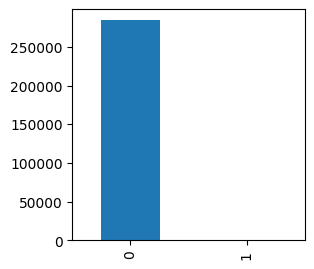

In [ ]:
df['Class'].value_counts().plot.bar(figsize=(3,3))

# We can see a before and After on how scaling the data gives us a more normal distribution.

<Axes: >

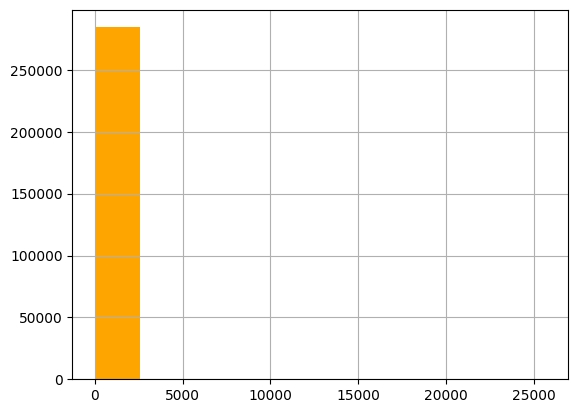

In [26]:
df['Amount'].describe()
df['Amount'].hist(color = 'orange')

<Axes: >

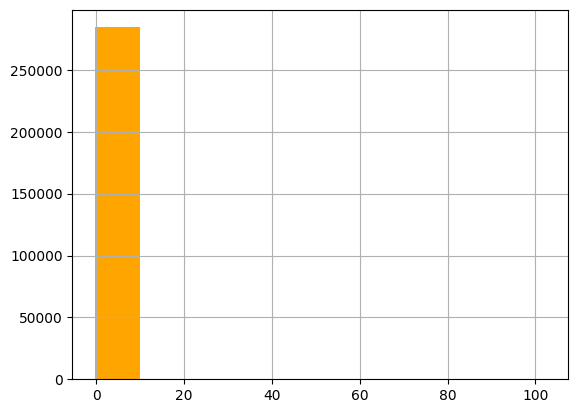

In [ ]:
checkTargetDistributiondf = df.copy()

scaler = StandardScaler()
checkTargetDistributiondf['Amount'] = scaler.fit_transform(checkTargetDistributiondf['Amount'].to_numpy().reshape(-1,1))
checkTargetDistributiondf['Amount'].describe()
checkTargetDistributiondf['Amount'].hist(color = 'orange')
#checkTargetDistributiondf['Amount'].describe()

# Training Model Section
- Note that: to use SMOTE for any Model I tested, we just have to uncomment where we instantiated a SMOTE class
- Also, we will be scaling the data AFTER we split the data to avoid data leakage and contamination, So that the model won't be learning from outside the training set.
- For measuring performance we will be using various metrics like precision, recall, and f1-score instead of Accuracy because of highly imbalanced data. I will also include a 2x2 confusion matrix to show False positives and False negatives
- We will be comparing 4 models, logistic regression, MLP, CNN, and RNN(LSTM).

# Create our first model
## Logistic Regression

In [27]:
features = df.drop('Class', axis=1)
target = df['Class']

xtrain,xtest, ytrain, ytest = train_test_split(features, target,  random_state=7)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


#smote = SMOTE()
#xtrain, ytrain = smote.fit_resample(xtrain, ytrain)


ytrain.value_counts()


0    213239
1       366
Name: Class, dtype: int64

In [ ]:

logistic_model = LogisticRegression()
logistic_model.fit(xtrain, ytrain) # input and labels passed into func
logistic_model.score(xtrain, ytrain)

y_pred = logistic_model.predict(xtest)

print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[69349  1727]
 [   13   113]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71076
           1       0.06      0.90      0.11       126

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202



# Try 2nd model
## MLP

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                1984      
                                                                 
 batch_normalization_15 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________
Epoch 1/10
13328/13328 [==============================] - 44s 3ms/step - loss: 0.0761 - accuracy: 0.9726 - val_loss: 0.0336 - val_accuracy: 0.9907
Epoch 2/10
13328/13328 [==============================] - 43s 3ms/st

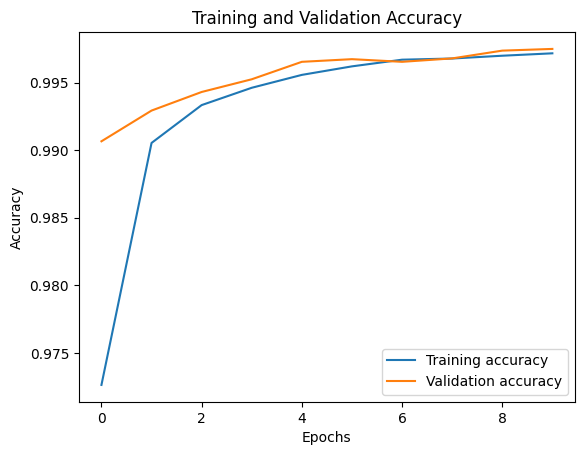

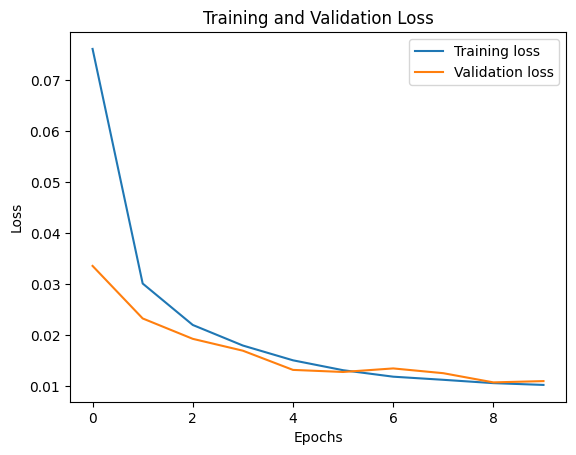

In [ ]:
features3 = df.drop('Class', axis=1)
target3 = df['Class']



xtrain,xtest, ytrain, ytest = train_test_split(features3, target3,  random_state=7)


scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

smote = SMOTE()
xtrain, ytrain = smote.fit_resample(xtrain, ytrain)

new_mlp = Sequential()
new_mlp.add(InputLayer(xtrain.shape[1],))
new_mlp.add(Dense(64, activation='relu'))
new_mlp.add(BatchNormalization())
new_mlp.add(Dense(1, activation='sigmoid'))

sgdOptimizer = SGD(learning_rate=0.001, momentum=0.9)
new_mlp.compile(optimizer=sgdOptimizer, loss='binary_crossentropy', metrics=['accuracy'])
#new_mlp.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

new_mlp.summary()
# Plotting training & validation accuracy
history = new_mlp.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred = new_mlp.predict(xtest.reshape(xtest.shape[0], xtest.shape[1]))
pred = (pred > 0.5).astype(int)
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

2226/2226 [==============================] - 3s 1ms/step
[[70914   162]
 [   16   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.40      0.87      0.55       126

    accuracy                           1.00     71202
   macro avg       0.70      0.94      0.78     71202
weighted avg       1.00      1.00      1.00     71202



# 3rd model:
# Convolutional Neural Network

In [ ]:
features1 = df.drop('Class', axis=1)
target1 = df['Class']



xtrain,xtest, ytrain, ytest = train_test_split(features1, target1,  random_state=7)


scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

smote = SMOTE()
xtrain, ytrain = smote.fit_resample(xtrain, ytrain)

xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)

xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((426478, 30, 1), (71202, 30, 1), (426478,), (71202,))

In [ ]:



cnn_model = Sequential()
#cnn_model.add(InputLayer(xtrain.shape[1],1))
cnn_model.add(Conv1D(32,2,activation = 'relu', input_shape = xtrain[0].shape))
cnn_model.add(BatchNormalization())
#cnn_model.add(MaxPool1D(2))
#cnn_model.add(Dropout(0.5))

cnn_model.add(Conv1D(64,2,activation = 'relu'))
cnn_model.add(BatchNormalization())
#cnn_model.add(MaxPool1D(
#cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())

cnn_model.add(Dense(1,activation = 'sigmoid'))

sgdOptimizer = SGD(learning_rate=0.001, momentum=0.9)
cnn_model.compile(optimizer=sgdOptimizer, loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_10 (Ba  (None, 29, 32)            128       
 tchNormalization)                                               
                                                                 
 conv1d_10 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_11 (Ba  (None, 28, 64)            256       
 tchNormalization)                                               
                                                                 
 flatten_3 (Flatten)         (None, 1792)              0         
                                                                 
 dense_14 (Dense)            (None, 1)               

In [ ]:
history = cnn_model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10
13328/13328 [==============================] - 61s 4ms/step - loss: 0.0522 - accuracy: 0.9819 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 2/10
13328/13328 [==============================] - 59s 4ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.0216 - val_accuracy: 0.9941
Epoch 3/10
13328/13328 [==============================] - 59s 4ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.0188 - val_accuracy: 0.9947
Epoch 4/10
13328/13328 [==============================] - 59s 4ms/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 0.0132 - val_accuracy: 0.9966
Epoch 5/10
13328/13328 [==============================] - 59s 4ms/step - loss: 0.0146 - accuracy: 0.9962 - val_loss: 0.0101 - val_accuracy: 0.9972
Epoch 6/10
13328/13328 [==============================] - 59s 4ms/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 0.0114 - val_accuracy: 0.9970
Epoch 7/10
13328/13328 [==============================] - 59s 4ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0

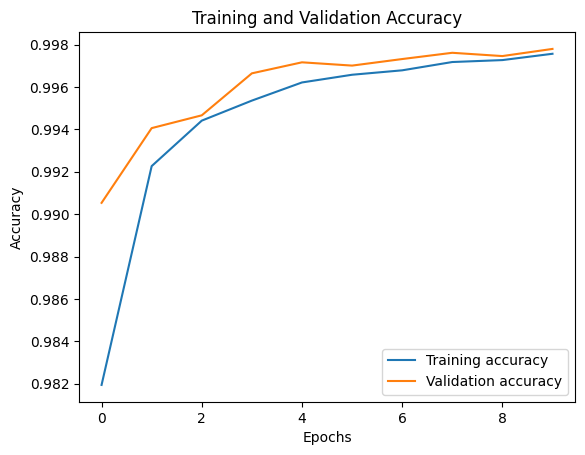

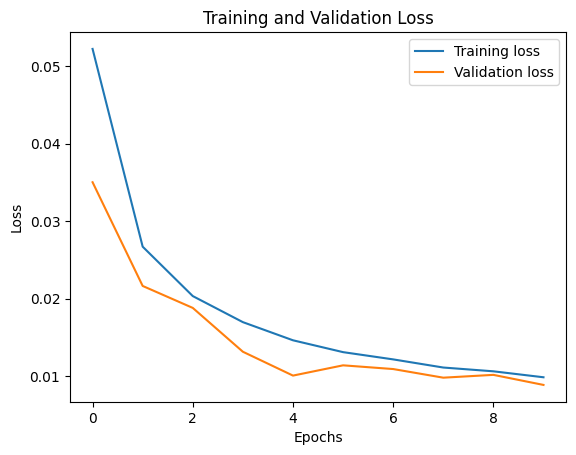

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
pred = cnn_model.predict(xtest.reshape(xtest.shape[0], xtest.shape[1],1))
pred = (pred > 0.5).astype(int)
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

2226/2226 [==============================] - 3s 1ms/step
[[70935   141]
 [   16   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.44      0.87      0.58       126

    accuracy                           1.00     71202
   macro avg       0.72      0.94      0.79     71202
weighted avg       1.00      1.00      1.00     71202



# 4th Model
## LSTM trial 2


In [24]:


features = df.drop('Class', axis=1)
target = df['Class']



xtrain,xtest, ytrain, ytest = train_test_split(features, target,  random_state=7)




scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


np.save('drive/MyDrive/DeepLearningData/xtestAfterScaling.npy', xtest)
np.save('drive/MyDrive/DeepLearningData/ytestAfterScaling.npy', ytest)
smote = SMOTE()
xtrain, ytrain = smote.fit_resample(xtrain, ytrain)


In [8]:
rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape = (xtrain.shape[1],1),activation = 'relu'))
rnn_model.add(BatchNormalization())
rnn_model.add(Dropout(0.5))

rnn_model.add(Dense(1, activation = 'sigmoid'))

sgdOptimizer = SGD(learning_rate=0.001, momentum=0.9)
rnn_model.compile(optimizer=Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17217 (67.25 KB)
Trainable params: 17089 (66.75 KB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________


Epoch 1/5
13328/13328 [==============================] - 330s 24ms/step - loss: 0.1036 - accuracy: 0.9620 - val_loss: 0.0440 - val_accuracy: 0.9851
Epoch 2/5
13328/13328 [==============================] - 317s 24ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0190 - val_accuracy: 0.9947
Epoch 3/5
13328/13328 [==============================] - 317s 24ms/step - loss: 0.0226 - accuracy: 0.9937 - val_loss: 0.0223 - val_accuracy: 0.9939
Epoch 4/5
13328/13328 [==============================] - 316s 24ms/step - loss: 0.0173 - accuracy: 0.9953 - val_loss: 0.0106 - val_accuracy: 0.9974
Epoch 5/5
13328/13328 [==============================] - 316s 24ms/step - loss: 0.3106 - accuracy: 0.8268 - val_loss: 0.5812 - val_accuracy: 0.9112


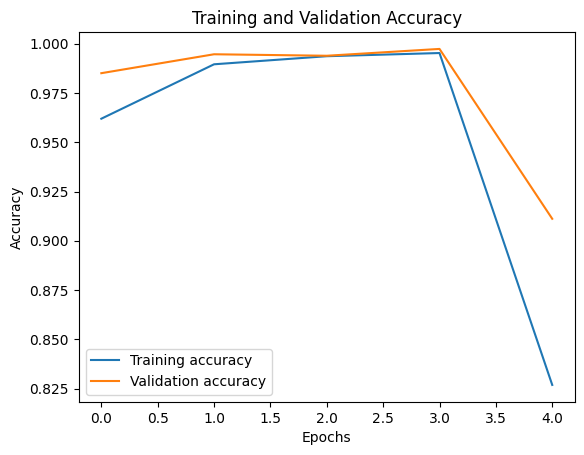

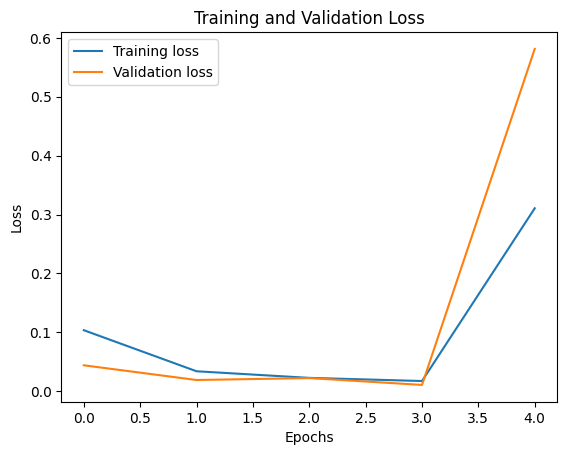

In [9]:

history = rnn_model.fit(xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1), ytrain, epochs = 5,
                        validation_data = (xtest.reshape(xtest.shape[0], xtest.shape[1],1),ytest), verbose = 1)


plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
pred = rnn_model.predict(xtest.reshape(xtest.shape[0], xtest.shape[1],1))
pred = (pred > 0.5).astype(int) # using a threshold of 0.5 for classification
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

2226/2226 [==============================] - 12s 6ms/step
[[64811  6265]
 [   60    66]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71076
           1       0.01      0.52      0.02       126

    accuracy                           0.91     71202
   macro avg       0.50      0.72      0.49     71202
weighted avg       1.00      0.91      0.95     71202



# Saving the model and creating a test

In [12]:
rnn_model.save('drive/MyDrive/DeepLearningData/rnn_model_with_SMOTE.keras')

In [25]:
from tensorflow.keras.models import load_model

xtest = np.load('drive/MyDrive/DeepLearningData/xtestAfterScaling.npy')
ytest = np.load('drive/MyDrive/DeepLearningData/ytestAfterScaling.npy')

rnn_local_model = load_model('drive/MyDrive/DeepLearningData/rnn_model_with_SMOTE.keras')


pred = rnn_local_model.predict(xtest.reshape(xtest.shape[0], xtest.shape[1],1))
pred = (pred > 0.5).astype(int)  # using a threshold of 0.5 for classification
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

2226/2226 [==============================] - 12s 5ms/step
[[64811  6265]
 [   60    66]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71076
           1       0.01      0.52      0.02       126

    accuracy                           0.91     71202
   macro avg       0.50      0.72      0.49     71202
weighted avg       1.00      0.91      0.95     71202

